Iteration 1: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 2: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 3: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 4: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 5: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 6: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 7: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 8: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 9: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 10: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 11: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 12: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 13: Best path so far = ['A', 'C', 'B', 'D', 'E'] with length 10
Iteration 14: Best path so far = ['A', 'C', 'B'

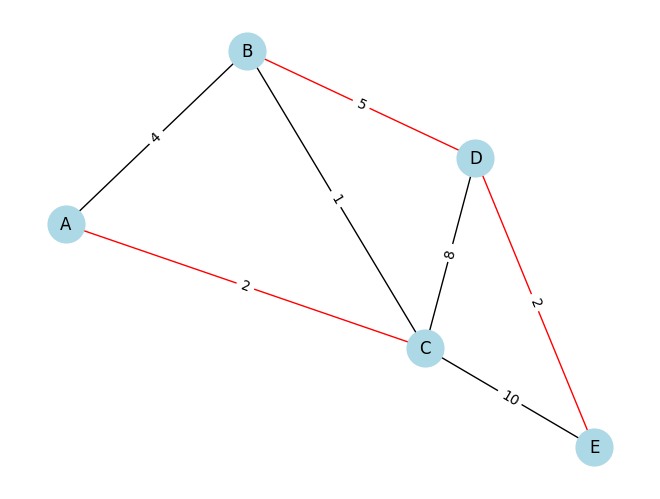

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
num_ants = 10
num_iterations = 100
alpha = 1  # Pheromone importance
beta = 2   # Heuristic importance
evaporation_rate = 0.5
pheromone_deposit = 1.0

def initialize_graph():
    """Creates a graph with nodes and edges."""
    G = nx.Graph()
    edges = [
        ("A", "B", 4), ("A", "C", 2), ("B", "C", 1),
        ("B", "D", 5), ("C", "D", 8), ("C", "E", 10),
        ("D", "E", 2)
    ]
    for u, v, weight in edges:
        G.add_edge(u, v, weight=weight, pheromone=1.0)  # Initialize with pheromone = 1.0
    return G

def select_next_node(G, current_node, visited):
    """Selects the next node based on probability."""
    neighbors = [n for n in G.neighbors(current_node) if n not in visited]
    if not neighbors:
        return None

    pheromone = np.array([G[current_node][n]['pheromone'] for n in neighbors])
    heuristic = np.array([1.0 / G[current_node][n]['weight'] for n in neighbors])

    probabilities = (pheromone ** alpha) * (heuristic ** beta)
    probabilities /= probabilities.sum()

    return random.choices(neighbors, weights=probabilities, k=1)[0]

def simulate_ant(G, start, end):
    """Simulates a single ant's journey."""
    current_node = start
    path = [current_node]
    visited = set(path)

    while current_node != end:
        next_node = select_next_node(G, current_node, visited)
        if next_node is None:
            return None, float('inf')  # No valid path found

        path.append(next_node)
        visited.add(next_node)
        current_node = next_node

    # Calculate path length
    length = sum(G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
    return path, length

def update_pheromones(G, all_paths):
    """Updates pheromones on the graph edges."""
    # Evaporate existing pheromones
    for u, v in G.edges:
        G[u][v]['pheromone'] *= (1 - evaporation_rate)

    # Deposit new pheromones
    for path, length in all_paths:
        pheromone_to_add = pheromone_deposit / length
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            G[u][v]['pheromone'] += pheromone_to_add

def aco_shortest_path(G, start, end):
    """Main ACO algorithm for finding the shortest path."""
    best_path = None
    best_length = float('inf')

    for iteration in range(num_iterations):
        all_paths = []
        for _ in range(num_ants):
            path, length = simulate_ant(G, start, end)
            if path:
                all_paths.append((path, length))
                if length < best_length:
                    best_path, best_length = path, length

        update_pheromones(G, all_paths)

        print(f"Iteration {iteration + 1}: Best path so far = {best_path} with length {best_length}")

    return best_path, best_length

def visualize_graph(G, path=None):
    """Visualizes the graph and highlights the shortest path."""
    pos = nx.spring_layout(G)
    edge_colors = ['red' if path and (u, v) in zip(path, path[1:]) else 'black' for u, v in G.edges]

    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='lightblue', node_size=700)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

if __name__ == "__main__":
    graph = initialize_graph()
    start_node, end_node = "A", "E"

    best_path, best_length = aco_shortest_path(graph, start_node, end_node)
    print(f"Best path found: {best_path} with length {best_length}")

    visualize_graph(graph, best_path)
